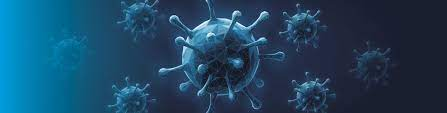

---



# **Covid-19 Dashboard**

---



# Tópicos

---





1.   Introdução;
2.   Análise Exploratória de Dados;
3.   Exploração Interativa dos Dados;
4.   Storytelling





# 1 - Introdução




## 1.1 - TLDR

 - **Dashboard**:
  - Google Data Studio [Dashboard Covid-19](https://lookerstudio.google.com/reporting/69f7801b-68d3-4ee9-8770-a43dfc73bd23).
 - **Processamento**:
  - Kaggle Notebook [link](https://www.kaggle.com/josumorfim/dashboard-covid-19`).
 - **Fontes**:
  - Casos pela universidade John Hopkins ([link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports));
  - Vacinação os dados brutos estão em [DataSUS](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/301983f2-aa50-4977-8fec-cfab0806cb0b?inner_span=True), e os dados ja processados estão no meu [Github](https://github.com/JosueMorfim/Covid-19/tree/main).
  - Os dados de população são do [IpeaData](http://www.ipeadata.gov.br/Default.aspx).

## 1.2 - Pandemia Coronavírus 2019

> A COVID-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. Fonte: Governo brasileiro ([link](https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus)).

A disponibilidade de dados sobre a evolução da pandemia no tempo em uma determinada região geográfica é fundamental para o seu combate! Este projeto busca construir um dashboard de dados para exploração e visualização interativa de dados sobre o avanço de casos e da vacinação do Brasil. O processamento de dados está neste link e o dashboard, neste [link](https://lookerstudio.google.com/reporting/69f7801b-68d3-4ee9-8770-a43dfc73bd23).

## 1.3 Dados

Os dados sobre casos da COVID-19 são compilados pelo centro de ciência de sistemas e engenharia da universidade americana John Hopkins (link). Os dados são atualizados diariamente deste janeiro de 2020 com uma granularidade temporal de dias e geográfica de regiões de países (estados, condados, etc.). O website do projeto pode ser acessado neste link enquanto os dados, neste link. Abaixo estão descritos os dados derivados do seu processamento.

 - **date**: data de referência;
 - **state**: estado;
 - **country**: país;
 - **population**: população estimada;
 - **confirmed**: número acumulado de infectados;
 - **confirmed_1d**: número diário de infectados;
 - **confirmed_moving_avg_7d**: média móvel de 7 dias do número diário de infectados;
 - **confirmed_moving_avg_7d_rate_14d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **deaths**: número acumulado de mortos;
 - **deaths_1d**: número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias do número diário de mortos;
 - **deaths_moving_avg_7d**: média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
 - **month**: mês de referência;
 - **year**: ano de referência.

Os dados sobre vacinação foram retirados do site [DataSUS](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/301983f2-aa50-4977-8fec-cfab0806cb0b?inner_span=True). Esses dados estavam separados em 20 partes de 13GB de dados cada parte. Foi realizado um pré processamento dos dados e colocado no Github no [link](https://github.com/JosueMorfim/Covid-19/tree/main). Vamos dividir esses dados em dois csv's, um com o compilado a nível estadual e outro com os dados em nivel de país.

No compilado por estados os dados derivados ficaram dispostos da seguinte maneira:

* **date**: data de referência;
* **country**: país;
* **population_total**: população total do país;
* **state**: estado;
* **population_per_state**: população total por estado;
* **one_shot_perc**: porcentagem de pessoas que tomaram a primeira dose em referencia a população do estado;
* **one_shot_daily**: numero de pessoas que tomaram a primeira dose por estado/data;
* **one_shot_total**:	acumulado de pessoas que tomaram a primeira dose por estado/data;
* **two_shot_perc**: porcentagem de pessoas que tomaram a segunda dose em referencia a população do estado;
* **two_shot_daily**: numero de pessoas que tomaram a segunda dose por estado/data;
* **two_shot_total**:	acumulado de pessoas que tomaram a segunda dose por estado/data;
* **three_shot_perc**: porcentagem de pessoas que tomaram a terceira dose em referencia a população do estado;
* **three_shot_daily**: numero de pessoas que tomaram a segunda dose por estado/data;
* **three_shot_total**: acumulado de pessoas que tomaram a segunda dose por estado/data.

No compilado dos dados de vacinação a nível do Brasil, ficamos com os seguintes dados:

* **date**:	data de referência;
* **country**: país;
* **one_shot_brazil**: numero de pessoas que tomaram primeira dose, por data;
* **two_shot_brazil**:	numero de pessoas que tomaram a segunda dose, por data;
* **three_shot_brazil**:	numero de pessoas que tomaram a terceira dose, por data;
* **population_total**: população total do Brasil;
* **one_shot_brazil_perc**:	porcentagem de pessoas que tomaram a primeira dose;
* **two_shot_brazil_perc**:	porcentagem de pessoas que tomaram a segunda dose;
* **three_shot_brazil_perc**: porcentagem de pessoas que tomaram a terceira dose.

# 2 - Análise Exploratória de Dados

* Importando Bibliotecas

In [ ]:
import math
from typing import Iterator
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

## 2.1 - Casos

## 2.1.1 - Extração

O dado está compilado em um arquivo por dia, como veremos abaixo:

In [ ]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv', sep=',')

cases.head()

Vamos ter que iterar dentro de um intervalo de tempo definido para extraí-lo.

In [ ]:
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
  date_range_days: int = (end_date - start_date).days
  for lag in range(date_range_days):
    yield start_date + timedelta(lag)


start_date = datetime(2021,  1,  1)
end_date   = datetime(2021, 12, 31)

Vamos selecionar as colunas de interesse e as linhas referentes ao Brasil

In [ ]:
cases = None
cases_is_empty = True

for date in date_range(start_date=start_date, end_date=end_date):

  date_str = date.strftime('%m-%d-%Y')
  data_source_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_str}.csv'

  case = pd.read_csv(data_source_url, sep=',')

  case = case.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key', 'Case_Fatality_Ratio'], axis=1)
  case = case.query('Country_Region == "Brazil"').reset_index(drop=True)
  case['Date'] = pd.to_datetime(date.strftime('%Y-%m-%d'))

  if cases_is_empty:
    cases = case
    cases_is_empty = False
  else:
     cases = pd.concat([cases, case], axis=0, ignore_index=True)

## 2.1 - Wrangling

In [ ]:
cases.query('Province_State == "Sao Paulo"').head()

In [ ]:
cases.shape

In [ ]:
cases.info()

Renomeando colunas.

In [ ]:
cases = cases.rename(
  columns={
    'Province_State': 'state',
    'Country_Region': 'country'
  }
)

for col in cases.columns:
  cases = cases.rename(columns={col: col.lower()})

Ajustando nome dos estados.

In [ ]:
states_map = {
    'Amapa': 'Amapá',
    'Ceara': 'Ceará',
    'Espirito Santo': 'Espírito Santo',
    'Goias': 'Goiás',
    'Para': 'Pará',
    'Paraiba': 'Paraíba',
    'Parana': 'Paraná',
    'Piaui': 'Piauí',
    'Rondonia': 'Rondônia',
    'Sao Paulo': 'São Paulo'
}

cases['state'] = cases['state'].apply(lambda state: states_map.get(state) if state in states_map.keys() else state)

Vamos adicionar novas colunas para enriquecer nossa base de dados.

* Chaves Temporais:

In [ ]:
cases['month'] = cases['date'].apply(lambda date: date.strftime('%Y-%m'))
cases['year']  = cases['date'].apply(lambda date: date.strftime('%Y'))

* População estimada do estado:

In [ ]:
cases.head()

In [ ]:
cases['population'] = round(100000 * (cases['confirmed'] / cases['incident_rate']))
cases = cases.drop('incident_rate', axis=1)

* Número, média móvel (7 dias) e estabilidade (14 dias) de casos e mortes por estado:

In [ ]:
cases_ = None
cases_is_empty = True

def get_trend(rate: float) -> str:

  if np.isnan(rate):
    return np.NaN

  if rate < 0.75:
    status = 'downward'
  elif rate > 1.15:
    status = 'upward'
  else:
    status = 'stable'

  return status


for state in cases['state'].drop_duplicates():

  cases_per_state = cases.query(f'state == "{state}"').reset_index(drop=True)
  cases_per_state = cases_per_state.sort_values(by=['date'])

  cases_per_state['confirmed_1d'] = cases_per_state['confirmed'].diff(periods=1)
  cases_per_state['confirmed_moving_avg_7d'] = np.ceil(cases_per_state['confirmed_1d'].rolling(window=7).mean())
  cases_per_state['confirmed_moving_avg_7d_rate_14d'] = cases_per_state['confirmed_moving_avg_7d']/cases_per_state['confirmed_moving_avg_7d'].shift(periods=14)
  cases_per_state['confirmed_trend'] = cases_per_state['confirmed_moving_avg_7d_rate_14d'].apply(get_trend)

  cases_per_state['deaths_1d'] = cases_per_state['deaths'].diff(periods=1)
  cases_per_state['deaths_moving_avg_7d'] = np.ceil(cases_per_state['deaths_1d'].rolling(window=7).mean())
  cases_per_state['deaths_moving_avg_7d_rate_14d'] = cases_per_state['deaths_moving_avg_7d']/cases_per_state['deaths_moving_avg_7d'].shift(periods=14)
  cases_per_state['deaths_trend'] = cases_per_state['deaths_moving_avg_7d_rate_14d'].apply(get_trend)

  if cases_is_empty:
    cases_ = cases_per_state
    cases_is_empty = False
  else:
    cases_ = pd.concat([cases_, cases_per_state], axis=0, ignore_index=True)

cases = cases_
cases_ = None



Realizando type casting das colunas.

In [ ]:
cases['population'] = cases['population'].astype('Int64')
cases['confirmed_1d'] = cases['confirmed_1d'].astype('Int64')
cases['confirmed_moving_avg_7d'] = cases['confirmed_moving_avg_7d'].astype('Int64')
cases['deaths_1d'] = cases['deaths_1d'].astype('Int64')
cases['deaths_moving_avg_7d'] = cases['deaths_moving_avg_7d'].astype('Int64')

Vamos reorganizar as colunas.

In [ ]:
cases = cases[['date', 'country', 'state', 'population', 'confirmed', 'confirmed_1d', 'confirmed_moving_avg_7d', 'confirmed_moving_avg_7d_rate_14d', 'confirmed_trend', 'deaths', 'deaths_1d', 'deaths_moving_avg_7d', 'deaths_moving_avg_7d_rate_14d', 'deaths_trend', 'month', 'year']]

cases.tail(n=25)

## 2.1 - Carregamento ('covid-cases.csv')

In [ ]:
cases.to_csv('./covid-cases.csv', sep=',', index=False)

## 2.2 - Vacinação por estado

Os dados da vacinação foram retirados dos arquivos do [DataSUS](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/301983f2-aa50-4977-8fec-cfab0806cb0b?inner_span=True).

## 2.2.1 - Extração

Vamos baixar o arquivo

In [ ]:
!wget https://raw.githubusercontent.com/JosueMorfim/Covid-19/main/ipeadata_pop.csv

!wget https://raw.githubusercontent.com/JosueMorfim/Covid-19/main/vaccines_2021.csv

vaccines = pd.read_csv('vaccines_2021.csv', sep=';', low_memory=False,parse_dates=[1], infer_datetime_format=True)

vaccines.head()

Vamos carregar os dados da vacina no DataFrame vaccines_per_state e os dados de população retirados do site do ipeadata, em uma DataFrame chamado population.

In [ ]:
vaccines_per_state = pd.read_csv('vaccines_2021.csv', sep=';', low_memory=False,parse_dates=[1], infer_datetime_format=True)

vaccines_per_state.head()

In [ ]:
population = pd.read_csv('ipeadata_pop.csv',sep=';', skiprows=1)

population.head()

## - 2.2.2 - Wrangling

Vamos  enriquecer os dados, adicionando uma coluna com o nome do país.

In [ ]:
vaccines_per_state['country'] = 'Brazil'
vaccines_per_state.head()

In [ ]:
vaccines_per_state.shape

In [ ]:
vaccines_per_state.info()

Agora iremos pegar do site do ipeadata a população do ultimo senso(2022), com a separação da população por estado.

Vamos pegar apenas as colunas de interesse, e ja vamos renomear.

In [ ]:
population = population[['Estado','2022']]
population = population.rename(columns={'Estado' : 'state','2022':'population_per_state'})
population.head()

Vamos fazer um merge entre os dados de vaccinas e população.

In [ ]:
vaccines_per_state = pd.merge(vaccines_per_state,population,how='inner')

vaccines_per_state.head()

In [ ]:
vaccines_per_state.shape

Vamos tratar os dados faltantes, a estratégia será a de preencher os buracos com o valor anterior válido mais próximo.

In [ ]:
vaccines_per_state = vaccines_per_state.fillna(method='ffill')

Desta vez vamos somar a população de cada estado, para criar uma coluna com a população total do país.

In [ ]:
vaccines_per_state['population_total'] = vaccines_per_state['population_per_state'].drop_duplicates().sum()
vaccines_per_state.head()

Vamos criar uma coluna com o total primeira,segunda e terceira dose aplicadas, agrupado por estado.

In [ ]:
vaccines_per_state['one_shot_total'] = vaccines_per_state.groupby('state')['one_shot_daily'].cumsum()
vaccines_per_state['two_shot_total'] = vaccines_per_state.groupby('state')['two_shot_daily'].cumsum()
vaccines_per_state['three_shot_total'] = vaccines_per_state.groupby('state')['three_shot_daily'].cumsum()

vaccines_per_state.head()

Vamos criar colunas com a porcentagem do acumulado do total de vacinados, em comparação com a população de cada estado.

In [ ]:
pd.set_option('display.float_format', '{:.8f}'.format)

vaccines_per_state['one_shot_perc'] = (vaccines_per_state['one_shot_total'] / vaccines_per_state['population_per_state']).astype(float)
vaccines_per_state['two_shot_perc'] = (vaccines_per_state['two_shot_total'] / vaccines_per_state['population_per_state']).astype(float)
vaccines_per_state['three_shot_perc'] = (vaccines_per_state['three_shot_total'] / vaccines_per_state['population_per_state']).astype(float)


vaccines_per_state['one_shot_perc'] = vaccines_per_state['one_shot_perc'].apply(lambda x: "{:.4f}".format(x))
vaccines_per_state['two_shot_perc'] = vaccines_per_state['two_shot_perc'].apply(lambda x: "{:.4f}".format(x))
vaccines_per_state['three_shot_perc'] = vaccines_per_state['three_shot_perc'].apply(lambda x: "{:.4f}".format(x))

vaccines_per_state.head(20)

Agora que nossos dados estão prontos, vamos reorganizar as colunas.

In [ ]:
vaccines_per_state = vaccines_per_state[['date','country','population_total','state','population_per_state','one_shot_perc','one_shot_daily','one_shot_total','two_shot_perc','two_shot_daily','two_shot_total','three_shot_perc','three_shot_daily','three_shot_total']]
vaccines_per_state.head()

In [ ]:
vaccines_per_state.info()

In [ ]:
vaccines_per_state.shape

## 2.2.3 - Carregamento ('covid-vaccines-state.csv')

In [ ]:
vaccines_per_state.to_csv('covid-vaccines-state.csv',sep=',', index=False)

## 2.3 - Vacinação no Brasil

In [ ]:
vaccines_brazil = vaccines_per_state

In [ ]:
vaccines_brazil.head()

In [ ]:
vaccines_brazil.info()

## 2.3.1 - Wrangling

Vamos separar apenas as colunas de interesse neste momento.

In [ ]:
vaccines_brazil = vaccines_brazil[['date','country','one_shot_daily','two_shot_daily','three_shot_daily']]
vaccines_brazil.head()

In [ ]:
vaccines_brazil = vaccines_brazil.groupby(['date','country']).sum().reset_index()
vaccines_brazil.head()

In [ ]:
vaccines_brazil.info()

Criando coluna da primeira,segunda e terceira dose aplicadas no brasil acumulativo, e também vamos eliminar as colunas desnecessárias .

In [ ]:
vaccines_brazil['one_shot_brazil'] = vaccines_brazil.groupby('country')['one_shot_daily'].cumsum()
vaccines_brazil['two_shot_brazil'] = vaccines_brazil.groupby('country')['two_shot_daily'].cumsum()
vaccines_brazil['three_shot_brazil'] = vaccines_brazil.groupby('country')['three_shot_daily'].cumsum()

vaccines_brazil = vaccines_brazil[['date','country','one_shot_brazil','two_shot_brazil','three_shot_brazil']]

vaccines_brazil.head()

Vamos adicionar uma coluna com a população total do Brasil, sabemos que o valor é 203070494, pois temos essa coluna no DataFrame anterior.

In [ ]:
population_total = 203070494

vaccines_brazil['population_total'] = population_total

vaccines_brazil.head()

Vamos criar uma coluna de porcentagem para cada dose.

In [ ]:
vaccines_brazil['one_shot_brazil_perc'] = (vaccines_brazil['one_shot_brazil'] / vaccines_brazil['population_total']).astype(float)
vaccines_brazil['two_shot_brazil_perc'] = (vaccines_brazil['two_shot_brazil'] / vaccines_brazil['population_total']).astype(float)
vaccines_brazil['three_shot_brazil_perc'] = (vaccines_brazil['three_shot_brazil'] / vaccines_brazil['population_total']).astype(float)


vaccines_brazil['one_shot_brazil_perc'] = vaccines_brazil['one_shot_brazil_perc'].apply(lambda x: "{:.4f}".format(x))
vaccines_brazil['two_shot_brazil_perc'] = vaccines_brazil['two_shot_brazil_perc'].apply(lambda x: "{:.4f}".format(x))
vaccines_brazil['three_shot_brazil_perc'] = vaccines_brazil['three_shot_brazil_perc'].apply(lambda x: "{:.4f}".format(x))

In [ ]:
vaccines_brazil.head(20)

In [ ]:
vaccines_brazil.info()

## 2.3.2 - Carregamento ('vaccines-brazil.csv')

In [ ]:
vaccines_brazil.to_csv('vaccines-brasil.csv',sep=',', index=False)

3.1

# 3 - Exploração Interativa de Dados

## 3.1 - KPIs

O dashboard de dados contem os seguintes indicadores chaves de desempenho (key performance indicator ou KPI) consolidados:

* Casos e mortes nas 24 horas;
* Média móvel (7 dias) de casos e mortes;
* Tendência de casos e mortes;
* Proporção de vacinados com 1ª, 2ª e 3ª doses.
* Quantidade de vacinados com 1ª, 2ª e 3ª doses.

## 3.2 - EDA

*  Distribuição do números de casos e mortes ao longo do tempo;
*  Distribuição da média móvel (7 dias) do números de casos e mortes ao longo do tempo;
*  Distribuição geográfica dos casos por estado por dia.
* Distribuição geográfica da aplicação da 1ª, 2ª e 3ª doses das vacinas por estado por dia.

# 4 - Storytelling

## **O Inicio**

Em 11 de janeiro de 2020, a China oficialmente confirmou a primeira morte relacionada à Covid-19. Devido à natureza fechada e ao regime autoritário do país, a precisão dos dados é limitada. Em 4 de fevereiro de 2020, o Brasil declarou "Estado de Emergência". Posteriormente, em 26 de fevereiro de 2020, o país registrou seu primeiro caso de Covid-19 em São Paulo.

A situação atingiu um marco significativo em 11 de março de 2020, quando a Organização Mundial da Saúde (OMS) declarou oficialmente a Covid-19 como uma pandemia global. Caracterizado por ser um vírus novo de origem desconhecida, com uma elevada taxa de transmissão, o vírus se disseminou rapidamente por todo o mundo. Analistas prognosticavam milhões de mortes em poucos meses, levando governos a implementar medidas drásticas, incluindo lockdowns e quarentenas para setores considerados não essenciais, na tentativa de conter a propagação do vírus. No entanto, essas medidas, por mais rigorosas que fossem, não conseguiram conter efetivamente a disseminação da Covid-19.

--------

## **A vacinação**

Após a aprovação da primeira vacina contra a COVID-19 pela ANVISA, sua administração teve início no Brasil no dia 17 de janeiro de 2021, com a enfermeira Mônica Calazans sendo a primeira a recebê-la. Contudo, esse marco foi acompanhado por um cenário de significativa controvérsia e debate entre o governo, o legislativo, o judiciário, órgãos de estado como a ANVISA e a mídia. As discussões envolviam a eficácia das vacinas e a implementação de medidas restritivas.

Inicialmente, algumas vacinas foram apresentadas com taxas de eficácia superiores a 90%. No entanto, ao longo do tempo, revisões foram realizadas, e a eficácia dessas vacinas tendia a diminuir com o surgimento de novas variantes do vírus. Apesar disso, alguns institutos afirmavam que as vacinas contribuíam para prevenir casos graves da doença.

O [Dashboard](https://lookerstudio.google.com/u/0/reporting/69f7801b-68d3-4ee9-8770-a43dfc73bd23/page/y11jD) destaca que, embora a vacinação tenha começado em janeiro, os casos de infecção continuaram a aumentar até meados de junho de 2021, atingindo 37% da população com a 1ª Dose e cerca de 13% com a 2ª Dose. A partir desse ponto, uma mudança na tendência começou a se manifestar. No entanto, o gráfico de óbitos já mostrou uma tendência de queda em 12 de abril de 2021. Essa diminuição pode estar relacionada à variante ou ao fato de que a eficácia de imunização do "imunizante" não era alta, mas o efeito profilático da vacina é eficaz, contribuindo positivamente nesse período.

A discrepância nos índices de vacinação entre estados, evidenciada no final de 2021, aponta para possíveis desafios logísticos e de insumos enfrentados por algumas localidades. Enquanto São Paulo apresentou um avanço significativo na imunização, com aproximadamente 93% da população vacinada com a primeira dose e 81% com a segunda dose, Roraima registrou índices mais modestos, com 62% e 45%, respectivamente.

Além de questões logísticas, o interesse da população em se vacinar pode ter sido um fator determinante nessa disparidade. Variações nos níveis de conscientização, educação em saúde e confiança nas vacinas podem influenciar diretamente a adesão às campanhas de imunização.

----

## **Conclusão**

A análise dos dados sugere que a vacinação desempenhou um papel crucial na mitigação dos impactos da pandemia, contribuindo para a redução significativa nos casos de óbito por COVID-19. Contudo, é importante ressaltar que, embora tenha havido uma melhoria, a erradicação completa do vírus parece improvável.

A necessidade contínua de vacinação periódica, conforme recomendado por especialistas, destaca a importância de manter a doença controlada e prevenir surtos futuros. Assim, a gestão eficaz da vacinação continua sendo uma estratégia-chave para enfrentar os desafios persistentes impostos pela COVID-19 e garantir a segurança da população.